### Understanding Neural Netrowks and Machine Learning
#### My first attempt to build perceprton 
##### Update weights with (Y - YHAT) * X (  i.e. Our model is Y = WTRANS . X )


1. Initialise weights vector as lenghth of  column_number(X) + 1 ( for bias unit)
2. for each row, update the weights for number of epochs * learning rate








In [1]:
import numpy as np

In [2]:
class Perceptron:
    
    def __init__(self,learning_rate=0.01,num_iterations =100,randomState =42):
        np.random.seed(randomState)
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        
        
    def calc_z(self,X):
        return np.dot(X,self.weights_[1:]) +self.weights_[0]
    
    def fit(self,X,Y):
        self.weights_ = np.random.randn(X.shape[1]+1)
        
        self.errors_ = []
        
        for _ in range(0,self.num_iterations):
            misclassification =0
            for input_v,target_v in zip(X,Y):
                yhat = self.predict(input_v)
                error = target_v -yhat
                # Perceptron learning rule to update weights:

                self.weights_[1:] = self.weights_[1:] + self.learning_rate*error*input_v
                self.weights_[0] = self.weights_[0] + self.learning_rate*error
                if (error !=0):
                    misclassification = misclassification +1
            
            self.errors_.append(misclassification)
            
            
        
    def predict(self,X):
        return np.where(self.calc_z(X)>0,1,-1)
    
    
    
    

In [3]:
import pandas as pd

In [4]:
data = pd.DataFrame({'X1':[1,2,3,4,5,6,7,8,9],'X2':[11,23,54,67,32,12,56,32,67]} )

In [5]:
data['Y'] = ( data['X2'] - 9*data['X1']) >0 #Lets check if our Perceptron can learn  simple linear decision boundary X2 - 9*X1 =0

In [6]:
data['Y'] = data['Y'].astype(int)

In [7]:
data['Y'] = data['Y'].replace(0,-1) # Labeling classes as 1 and -1

In [8]:
data['Y']

0    1
1    1
2    1
3    1
4   -1
5   -1
6   -1
7   -1
8   -1
Name: Y, dtype: int32

In [9]:
p = Perceptron()

In [10]:
p = Perceptron()

In [11]:
p.fit(data[['X1','X2']].values,data['Y'].values)

In [12]:
p.predict(data[['X1','X2']].values)

array([ 1,  1,  1,  1, -1, -1, -1, -1, -1])

In [15]:
p.weights_

array([ 0.47671415, -0.2382643 ,  0.00768854])

In [16]:
from mlxtend.plotting import plot_decision_regions

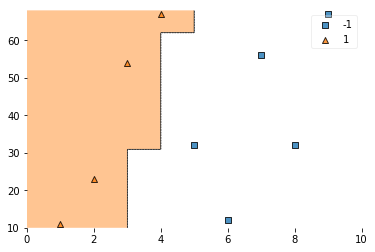

In [17]:
plot_decision_regions(data[['X1','X2']].values,data['Y'].values,p)

In [18]:
from sklearn import datasets

In [20]:
data = datasets.load_iris()

In [23]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  